# Credit Card Fraud Detection - End-to-End Data Science Project

## Introduction

Credit card fraud is a significant problem in the financial industry, costing billions of dollars annually. This project aims to build a machine learning model that can accurately detect fraudulent credit card transactions from legitimate ones.

### Objective
- Develop a robust machine learning model to classify credit card transactions as fraudulent or legitimate
- Handle class imbalance (fraudulent transactions are typically rare)
- Achieve high precision and recall to minimize both false positives and false negatives
- Compare different algorithms to find the best performing model

### Business Impact
- Reduce financial losses due to fraud
- Improve customer trust and satisfaction
- Automate fraud detection process
- Reduce manual review workload

## 1. Importing Required Libraries

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve

# Handling class imbalance
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Loading the Dataset

In [2]:
# Load the credit card dataset
print("Loading the dataset...")
df = pd.read_csv('creditcard.csv')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
df.head()

Loading the dataset...
Dataset shape: (284807, 31)

First few rows:
Dataset shape: (284807, 31)

First few rows:


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Basic information about the dataset
print("Dataset Information:")
print("=" * 50)
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print(f"\nColumn names:")
print(df.columns.tolist())

print(f"\nData types:")
print(df.dtypes)

print(f"\nMissing values:")
print(df.isnull().sum())

Dataset Information:
Number of rows: 284807
Number of columns: 31

Column names:
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Data types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8    

## 3. Exploratory Data Analysis (EDA)

Target Variable Analysis:
Legitimate transactions (Class 0): 284,315 (99.83%)
Fraudulent transactions (Class 1): 492 (0.17%)


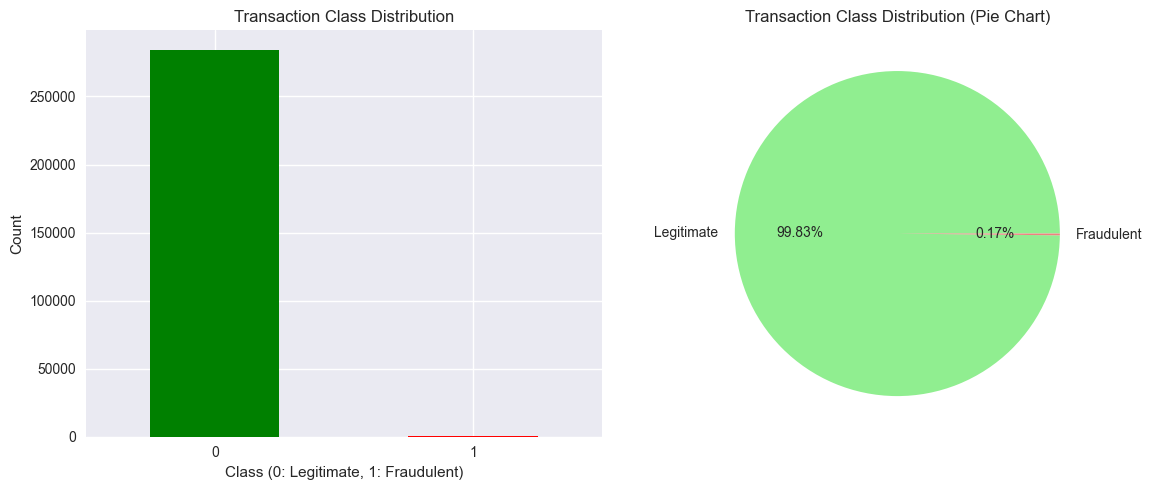


Class Imbalance Ratio: 577.88:1 (Legitimate:Fraudulent)


In [4]:
# Check the target variable distribution
print("Target Variable Analysis:")
print("=" * 50)

fraud_counts = df['Class'].value_counts()
fraud_percentages = df['Class'].value_counts(normalize=True) * 100

print(f"Legitimate transactions (Class 0): {fraud_counts[0]:,} ({fraud_percentages[0]:.2f}%)")
print(f"Fraudulent transactions (Class 1): {fraud_counts[1]:,} ({fraud_percentages[1]:.2f}%)")

# Visualize class distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
fraud_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Transaction Class Distribution')
plt.xlabel('Class (0: Legitimate, 1: Fraudulent)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(fraud_counts.values, labels=['Legitimate', 'Fraudulent'], autopct='%1.2f%%', 
        colors=['lightgreen', 'lightcoral'])
plt.title('Transaction Class Distribution (Pie Chart)')

plt.tight_layout()
plt.show()

print(f"\nClass Imbalance Ratio: {fraud_counts[0]/fraud_counts[1]:.2f}:1 (Legitimate:Fraudulent)")

In [5]:
# Statistical summary of numerical features
print("Statistical Summary:")
print("=" * 50)
print(df.describe())

Statistical Summary:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

Amount Statistics by Class:
             mean  median         std  min       max
Class                                               
0       88.291022   22.00  250.105092  0.0  25691.16
1      122.211321    9.25  256.683288  0.0   2125.87


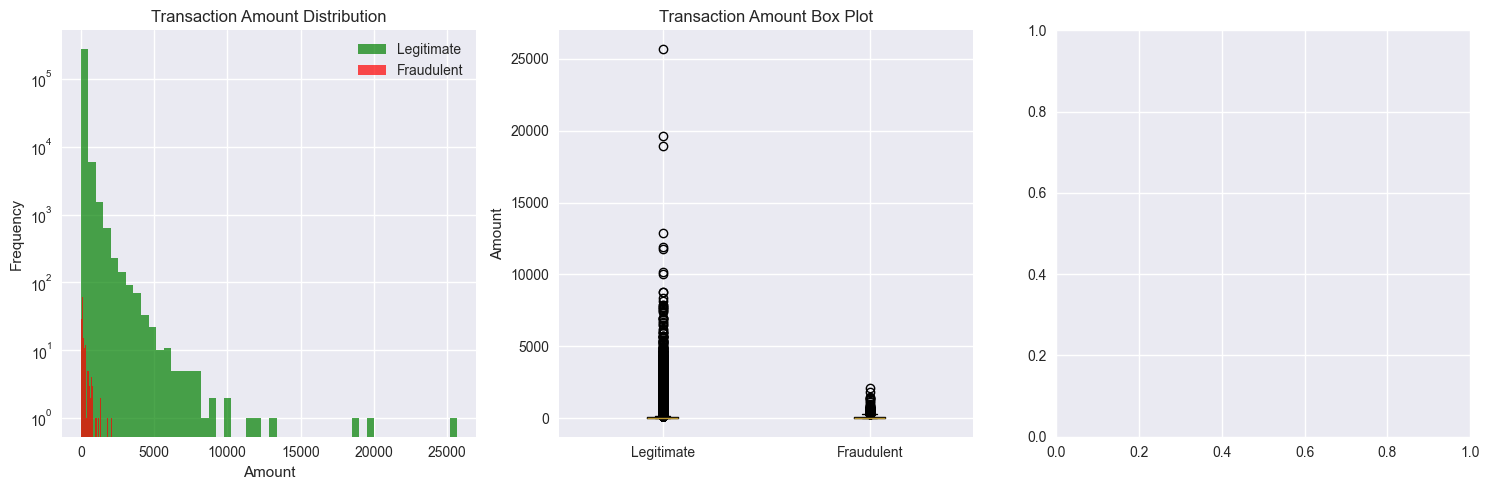

In [6]:
# Analyze Amount distribution for both classes
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df[df['Class'] == 0]['Amount'], bins=50, alpha=0.7, color='green', label='Legitimate')
plt.hist(df[df['Class'] == 1]['Amount'], bins=50, alpha=0.7, color='red', label='Fraudulent')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.boxplot([df[df['Class'] == 0]['Amount'], df[df['Class'] == 1]['Amount']], 
           labels=['Legitimate', 'Fraudulent'])
plt.title('Transaction Amount Box Plot')
plt.ylabel('Amount')

plt.subplot(1, 3, 3)
amount_stats = df.groupby('Class')['Amount'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Amount Statistics by Class:")
print(amount_stats)

plt.tight_layout()
plt.show()

Time Statistics by Class:
               mean   median           std    min       max
Class                                                      
0      94838.202258  84711.0  47484.015786    0.0  172792.0
1      80746.806911  75568.5  47835.365138  406.0  170348.0


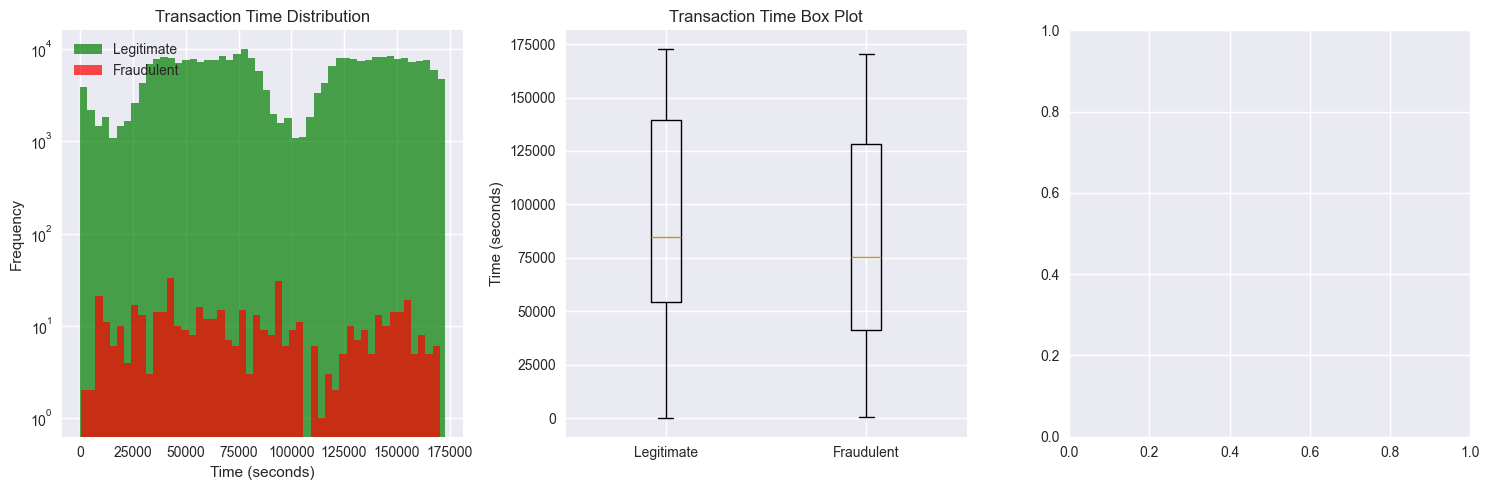

In [7]:
# Analyze Time distribution
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(df[df['Class'] == 0]['Time'], bins=50, alpha=0.7, color='green', label='Legitimate')
plt.hist(df[df['Class'] == 1]['Time'], bins=50, alpha=0.7, color='red', label='Fraudulent')
plt.title('Transaction Time Distribution')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.yscale('log')

plt.subplot(1, 3, 2)
plt.boxplot([df[df['Class'] == 0]['Time'], df[df['Class'] == 1]['Time']], 
           labels=['Legitimate', 'Fraudulent'])
plt.title('Transaction Time Box Plot')
plt.ylabel('Time (seconds)')

plt.subplot(1, 3, 3)
time_stats = df.groupby('Class')['Time'].agg(['mean', 'median', 'std', 'min', 'max'])
print("Time Statistics by Class:")
print(time_stats)

plt.tight_layout()
plt.show()

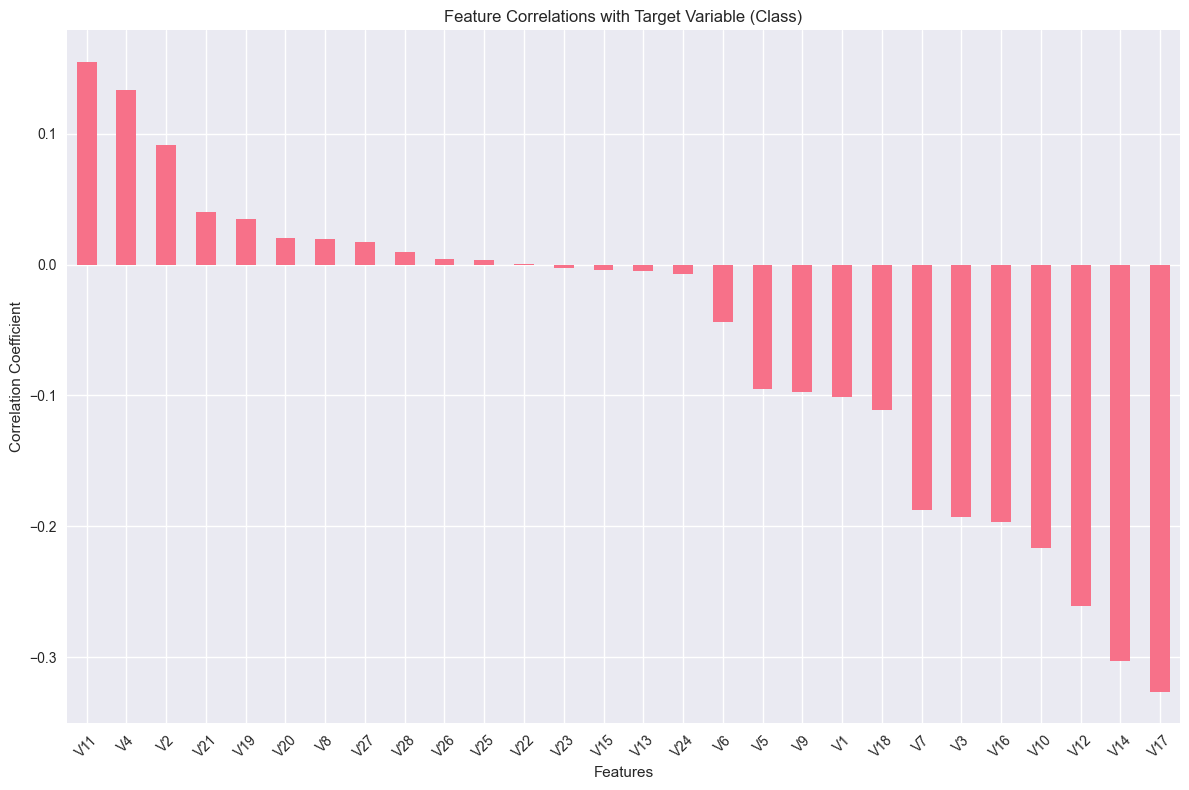

Top 10 features with highest correlation to fraud:
V11    0.154876
V4     0.133447
V2     0.091289
V21    0.040413
V19    0.034783
V20    0.020090
V8     0.019875
V27    0.017580
V28    0.009536
V26    0.004455
Name: Class, dtype: float64

Top 10 features with lowest correlation to fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [8]:
# Correlation analysis for V1-V28 features
v_features = [col for col in df.columns if col.startswith('V')]

# Calculate correlation with target variable
correlations = df[v_features + ['Class']].corr()['Class'].sort_values(ascending=False)

plt.figure(figsize=(12, 8))
correlations.drop('Class').plot(kind='bar')
plt.title('Feature Correlations with Target Variable (Class)')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 features with highest correlation to fraud:")
print(correlations.drop('Class').head(10))

print("\nTop 10 features with lowest correlation to fraud:")
print(correlations.drop('Class').tail(10))

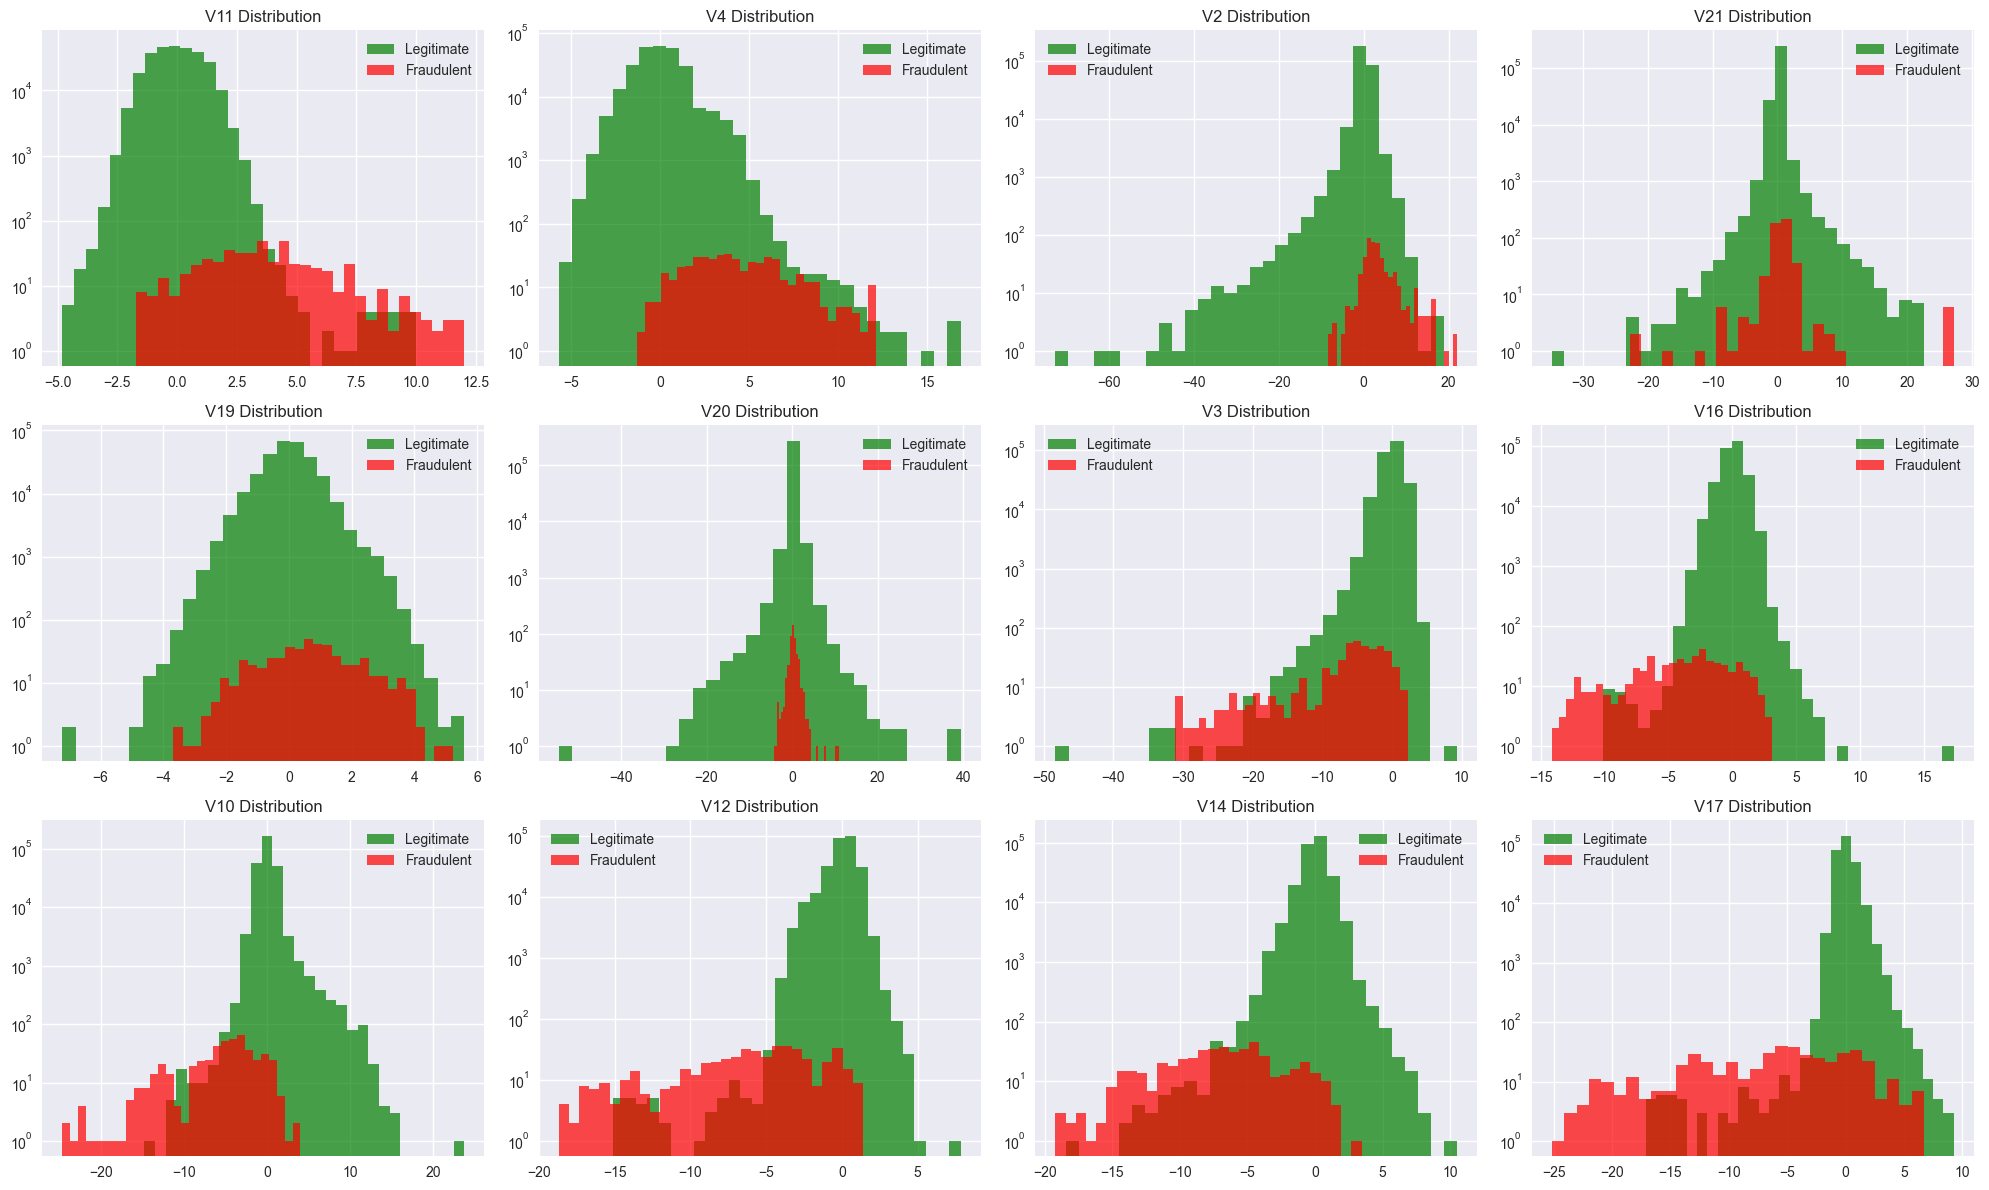

In [9]:
# Distribution of top correlated features
top_features = correlations.drop('Class').head(6).index.tolist()
bottom_features = correlations.drop('Class').tail(6).index.tolist()

plt.figure(figsize=(20, 12))

# Plot top correlated features
for i, feature in enumerate(top_features, 1):
    plt.subplot(3, 4, i)
    plt.hist(df[df['Class'] == 0][feature], bins=30, alpha=0.7, color='green', label='Legitimate')
    plt.hist(df[df['Class'] == 1][feature], bins=30, alpha=0.7, color='red', label='Fraudulent')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.yscale('log')

# Plot bottom correlated features
for i, feature in enumerate(bottom_features, 7):
    plt.subplot(3, 4, i)
    plt.hist(df[df['Class'] == 0][feature], bins=30, alpha=0.7, color='green', label='Legitimate')
    plt.hist(df[df['Class'] == 1][feature], bins=30, alpha=0.7, color='red', label='Fraudulent')
    plt.title(f'{feature} Distribution')
    plt.legend()
    plt.yscale('log')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing

In [10]:
# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Check for any missing values
print(f"\nMissing values in features: {X.isnull().sum().sum()}")
print(f"Missing values in target: {y.isnull().sum()}")

Features shape: (284807, 30)
Target shape: (284807,)

Missing values in features: 0
Missing values in target: 0


In [11]:
# Feature scaling using StandardScaler
print("Applying StandardScaler to normalize features...")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("Feature scaling completed!")
print(f"Scaled features shape: {X_scaled_df.shape}")

# Show statistics of scaled features
print("\nScaled features statistics:")
print(X_scaled_df.describe())

Applying StandardScaler to normalize features...
Feature scaling completed!
Scaled features shape: (284807, 30)

Scaled features statistics:
               Time            V1            V2            V3            V4  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -3.065637e-16 -1.506872e-17 -9.580116e-18 -8.622104e-17 -5.189230e-18   
std    1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00  1.000002e+00   
min   -1.996583e+00 -2.879855e+01 -4.403529e+01 -3.187173e+01 -4.013919e+00   
25%   -8.552120e-01 -4.698918e-01 -3.624707e-01 -5.872142e-01 -5.993788e-01   
50%   -2.131453e-01  9.245351e-03  3.965683e-02  1.186124e-01 -1.401724e-02   
75%    9.372174e-01  6.716939e-01  4.867202e-01  6.774569e-01  5.250082e-01   
max    1.642058e+00  1.253351e+00  1.335775e+01  6.187993e+00  1.191874e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848

## 5. Handling Class Imbalance

Before handling class imbalance:
Legitimate transactions: 284315
Fraudulent transactions: 492
Imbalance ratio: 577.88:1

Applying SMOTE to balance the classes...
After SMOTE:
Legitimate transactions: 284315
Fraudulent transactions: 284315
Balance ratio: 1.00:1
After SMOTE:
Legitimate transactions: 284315
Fraudulent transactions: 284315
Balance ratio: 1.00:1


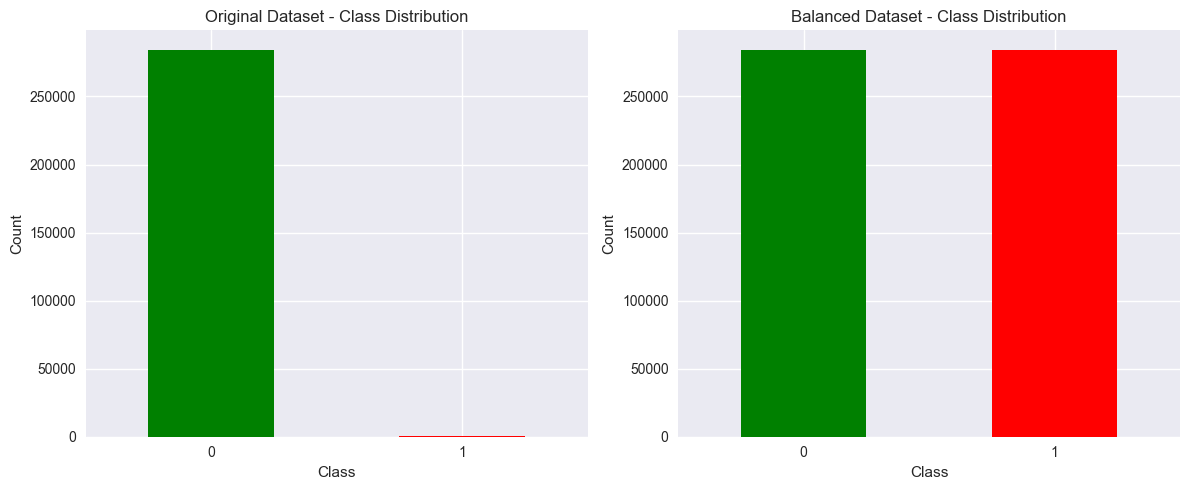

In [12]:
# Before handling class imbalance
print("Before handling class imbalance:")
print(f"Legitimate transactions: {sum(y == 0)}")
print(f"Fraudulent transactions: {sum(y == 1)}")
print(f"Imbalance ratio: {sum(y == 0) / sum(y == 1):.2f}:1")

# Apply SMOTE to handle class imbalance
print("\nApplying SMOTE to balance the classes...")
smote = SMOTE(random_state=42, sampling_strategy='auto')
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("After SMOTE:")
print(f"Legitimate transactions: {sum(y_balanced == 0)}")
print(f"Fraudulent transactions: {sum(y_balanced == 1)}")
print(f"Balance ratio: {sum(y_balanced == 0) / sum(y_balanced == 1):.2f}:1")

# Visualize the balanced dataset
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
original_counts = pd.Series(y).value_counts()
original_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Original Dataset - Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
balanced_counts = pd.Series(y_balanced).value_counts()
balanced_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Balanced Dataset - Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## 6. Train-Test Split

In [13]:
# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced
)

print("Train-Test Split Results:")
print("=" * 50)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Training set target distribution: {np.bincount(y_train)}")
print(f"Testing set target distribution: {np.bincount(y_test)}")

# Calculate percentages
train_legitimate_pct = (y_train == 0).sum() / len(y_train) * 100
train_fraud_pct = (y_train == 1).sum() / len(y_train) * 100
test_legitimate_pct = (y_test == 0).sum() / len(y_test) * 100
test_fraud_pct = (y_test == 1).sum() / len(y_test) * 100

print(f"\nTraining set - Legitimate: {train_legitimate_pct:.2f}%, Fraudulent: {train_fraud_pct:.2f}%")
print(f"Testing set - Legitimate: {test_legitimate_pct:.2f}%, Fraudulent: {test_fraud_pct:.2f}%")

Train-Test Split Results:
Training set shape: (454904, 30)
Testing set shape: (113726, 30)
Training set target distribution: [227452 227452]
Testing set target distribution: [56863 56863]

Training set - Legitimate: 50.00%, Fraudulent: 50.00%
Testing set - Legitimate: 50.00%, Fraudulent: 50.00%


## 7. Model Building

In [14]:
# Initialize models
print("Initializing models...")

# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

models = {
    'Logistic Regression': lr_model,
    'Random Forest': rf_model
}

print("Models initialized successfully!")

Initializing models...
Models initialized successfully!


In [15]:
# Train models and make predictions
results = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Store results
    results[name] = {
        'model': model,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"{name} training completed!")

print("\nAll models trained successfully!")


Training Logistic Regression...
Logistic Regression training completed!

Training Random Forest...
Random Forest training completed!

All models trained successfully!


## 8. Model Evaluation

In [16]:
# Function to calculate and display metrics
def evaluate_model(y_true, y_pred, y_pred_proba, model_name):
    """
    Evaluate a model and return metrics
    """
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    
    # Create confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm
    }

# Evaluate all models
evaluation_results = {}

for name, result in results.items():
    print(f"\n{'='*60}")
    print(f"EVALUATION RESULTS FOR {name.upper()}")
    print(f"{'='*60}")
    
    metrics = evaluate_model(y_test, result['y_pred'], result['y_pred_proba'], name)
    evaluation_results[name] = metrics
    
    # Print metrics
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Precision: {metrics['precision']:.4f}")
    print(f"Recall: {metrics['recall']:.4f}")
    print(f"F1-Score: {metrics['f1_score']:.4f}")
    print(f"ROC-AUC: {metrics['roc_auc']:.4f}")
    
    # Display confusion matrix
    print(f"\nConfusion Matrix:")
    print(metrics['confusion_matrix'])
    
    # Display detailed classification report
    print(f"\nDetailed Classification Report:")
    print(classification_report(y_test, result['y_pred'], target_names=['Legitimate', 'Fraudulent']))


EVALUATION RESULTS FOR LOGISTIC REGRESSION
Accuracy: 0.9492
Precision: 0.9735
Recall: 0.9235
F1-Score: 0.9479
ROC-AUC: 0.9899

Confusion Matrix:
[[55434  1429]
 [ 4348 52515]]

Detailed Classification Report:
              precision    recall  f1-score   support

  Legitimate       0.93      0.97      0.95     56863
  Fraudulent       0.97      0.92      0.95     56863

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726


EVALUATION RESULTS FOR RANDOM FOREST
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC-AUC: 1.0000

Confusion Matrix:
[[56849    14]
 [    0 56863]]

Detailed Classification Report:
              precision    recall  f1-score   support

  Legitimate       1.00      1.00      1.00     56863
  Fraudulent       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.

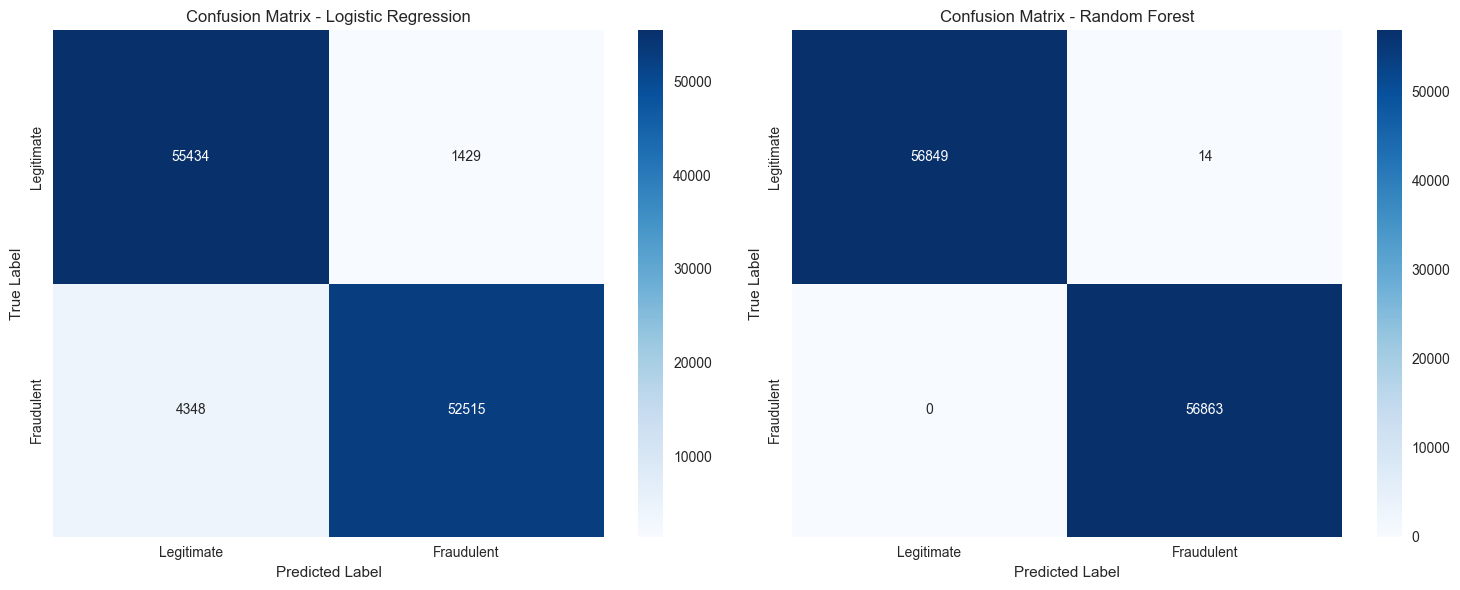

In [17]:
# Visualize confusion matrices
plt.figure(figsize=(15, 6))

for i, (name, metrics) in enumerate(evaluation_results.items(), 1):
    plt.subplot(1, 2, i)
    cm = metrics['confusion_matrix']
    
    # Create heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Legitimate', 'Fraudulent'],
                yticklabels=['Legitimate', 'Fraudulent'])
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

plt.tight_layout()
plt.show()

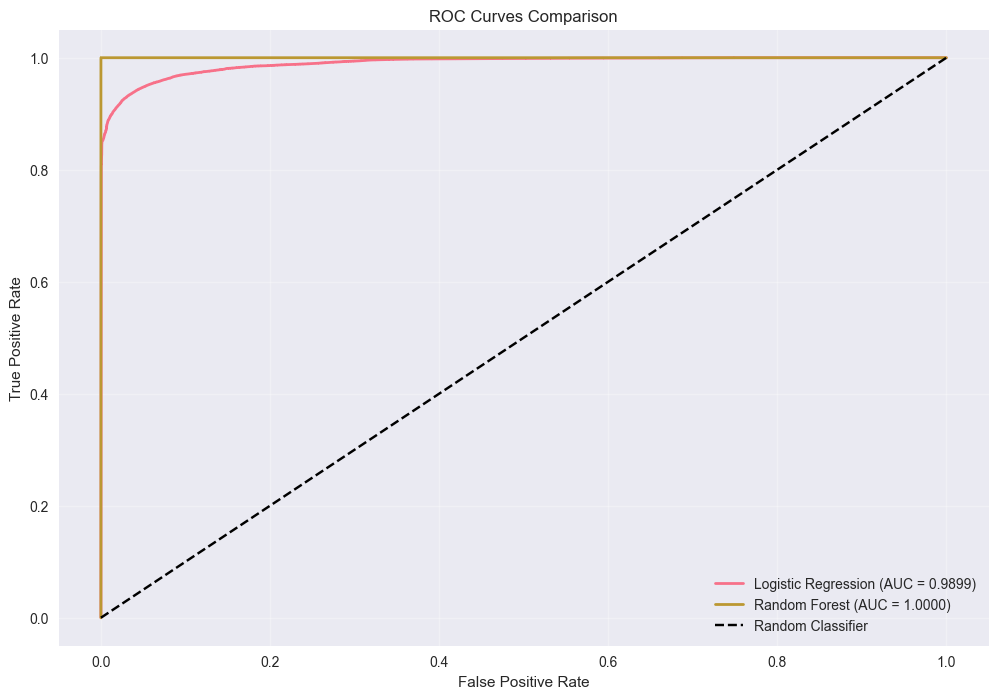

In [18]:
# Plot ROC curves
plt.figure(figsize=(12, 8))

for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    auc_score = evaluation_results[name]['roc_auc']
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.4f})', linewidth=2)

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
0  Logistic Regression    0.9492     0.9735  0.9235    0.9479   0.9899
1        Random Forest    0.9999     0.9998  1.0000    0.9999   1.0000


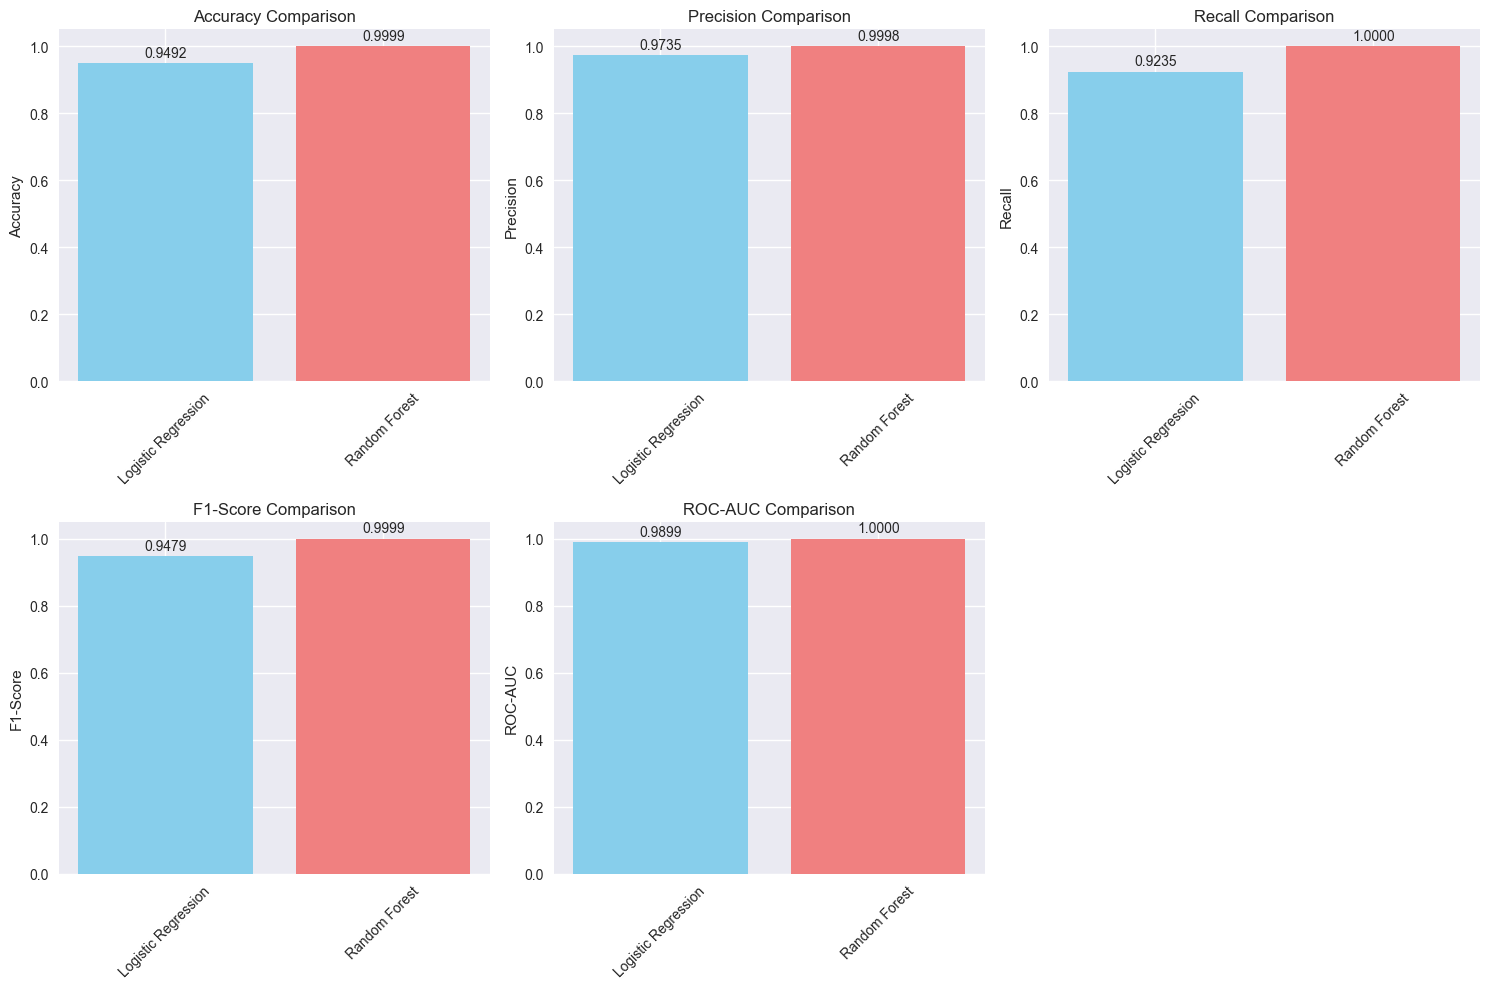

In [19]:
# Compare metrics across models
metrics_df = pd.DataFrame({
    'Model': list(evaluation_results.keys()),
    'Accuracy': [evaluation_results[name]['accuracy'] for name in evaluation_results.keys()],
    'Precision': [evaluation_results[name]['precision'] for name in evaluation_results.keys()],
    'Recall': [evaluation_results[name]['recall'] for name in evaluation_results.keys()],
    'F1-Score': [evaluation_results[name]['f1_score'] for name in evaluation_results.keys()],
    'ROC-AUC': [evaluation_results[name]['roc_auc'] for name in evaluation_results.keys()]
})

print("Model Performance Comparison:")
print("=" * 80)
print(metrics_df.round(4))

# Visualize metrics comparison
plt.figure(figsize=(15, 10))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    plt.bar(metrics_df['Model'], metrics_df[metric], color=['skyblue', 'lightcoral'])
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    
    # Add value labels on bars
    for j, v in enumerate(metrics_df[metric]):
        plt.text(j, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 9. Feature Importance Analysis (Random Forest)

Top 20 Most Important Features (Random Forest):
   Feature  Importance
14     V14    0.194566
10     V10    0.111627
4       V4    0.096513
12     V12    0.093452
17     V17    0.088044
11     V11    0.059937
16     V16    0.056785
3       V3    0.051302
2       V2    0.039329
9       V9    0.025063
7       V7    0.015710
21     V21    0.015675
18     V18    0.014996
8       V8    0.014207
19     V19    0.011703
27     V27    0.010882
5       V5    0.010058
29  Amount    0.009392
1       V1    0.009054
13     V13    0.008439


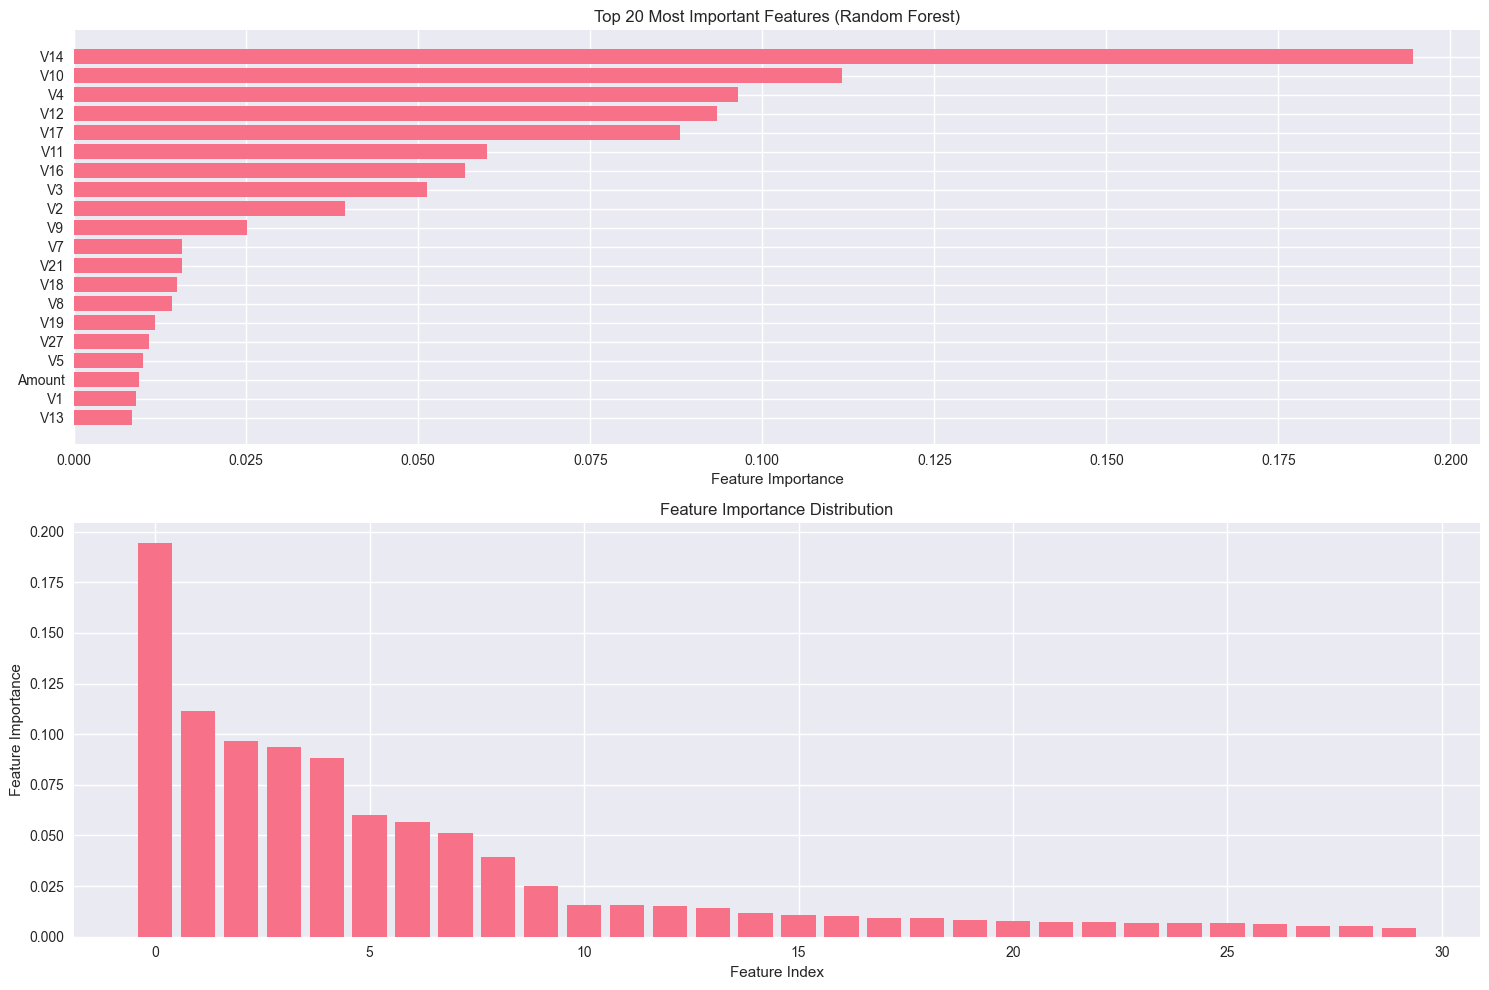

In [20]:
# Get feature importance from Random Forest
rf_model = results['Random Forest']['model']
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Create DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Top 20 Most Important Features (Random Forest):")
print("=" * 60)
print(importance_df.head(20))

# Visualize feature importance
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
top_20_features = importance_df.head(20)
plt.barh(range(len(top_20_features)), top_20_features['Importance'])
plt.yticks(range(len(top_20_features)), top_20_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 20 Most Important Features (Random Forest)')
plt.gca().invert_yaxis()

plt.subplot(2, 1, 2)
plt.bar(range(len(importance_df)), importance_df['Importance'])
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance Distribution')

plt.tight_layout()
plt.show()

## 10. Model Comparison & Conclusion

In [21]:
# Final comparison summary
print("FINAL MODEL COMPARISON SUMMARY")
print("=" * 80)

# Find the best model for each metric
best_accuracy = metrics_df.loc[metrics_df['Accuracy'].idxmax(), 'Model']
best_precision = metrics_df.loc[metrics_df['Precision'].idxmax(), 'Model']
best_recall = metrics_df.loc[metrics_df['Recall'].idxmax(), 'Model']
best_f1 = metrics_df.loc[metrics_df['F1-Score'].idxmax(), 'Model']
best_auc = metrics_df.loc[metrics_df['ROC-AUC'].idxmax(), 'Model']

print(f"Best Accuracy: {best_accuracy} ({metrics_df[metrics_df['Model'] == best_accuracy]['Accuracy'].iloc[0]:.4f})")
print(f"Best Precision: {best_precision} ({metrics_df[metrics_df['Model'] == best_precision]['Precision'].iloc[0]:.4f})")
print(f"Best Recall: {best_recall} ({metrics_df[metrics_df['Model'] == best_recall]['Recall'].iloc[0]:.4f})")
print(f"Best F1-Score: {best_f1} ({metrics_df[metrics_df['Model'] == best_f1]['F1-Score'].iloc[0]:.4f})")
print(f"Best ROC-AUC: {best_auc} ({metrics_df[metrics_df['Model'] == best_auc]['ROC-AUC'].iloc[0]:.4f})")

# Overall best model (based on F1-score as it balances precision and recall)
overall_best = best_f1
print(f"\nOverall Best Model (based on F1-Score): {overall_best}")

# Display the best model's detailed metrics
best_model_metrics = evaluation_results[overall_best]
print(f"\nDetailed Metrics for Best Model ({overall_best}):")
print(f"Accuracy: {best_model_metrics['accuracy']:.4f}")
print(f"Precision: {best_model_metrics['precision']:.4f}")
print(f"Recall: {best_model_metrics['recall']:.4f}")
print(f"F1-Score: {best_model_metrics['f1_score']:.4f}")
print(f"ROC-AUC: {best_model_metrics['roc_auc']:.4f}")

FINAL MODEL COMPARISON SUMMARY
Best Accuracy: Random Forest (0.9999)
Best Precision: Random Forest (0.9998)
Best Recall: Random Forest (1.0000)
Best F1-Score: Random Forest (0.9999)
Best ROC-AUC: Random Forest (1.0000)

Overall Best Model (based on F1-Score): Random Forest

Detailed Metrics for Best Model (Random Forest):
Accuracy: 0.9999
Precision: 0.9998
Recall: 1.0000
F1-Score: 0.9999
ROC-AUC: 1.0000


## 11. Business Insights and Recommendations

In [22]:
# Business insights analysis
print("BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("=" * 80)

# Calculate business metrics
best_model = results[overall_best]['model']
best_predictions = results[overall_best]['y_pred']
best_cm = evaluation_results[overall_best]['confusion_matrix']

# Extract confusion matrix values
tn, fp, fn, tp = best_cm.ravel()

print(f"\nConfusion Matrix Analysis for {overall_best}:")
print(f"True Negatives (Correctly identified legitimate): {tn:,}")
print(f"False Positives (Legitimate flagged as fraud): {fp:,}")
print(f"False Negatives (Fraud missed): {fn:,}")
print(f"True Positives (Correctly identified fraud): {tp:,}")

# Calculate business metrics
total_transactions = tn + fp + fn + tp
fraud_detection_rate = tp / (tp + fn) * 100
false_alarm_rate = fp / (fp + tn) * 100
cost_savings = fn  # Assuming each missed fraud costs the business
customer_inconvenience = fp  # Assuming each false positive inconveniences a customer

print(f"\nBusiness Impact Metrics:")
print(f"Total Transactions Analyzed: {total_transactions:,}")
print(f"Fraud Detection Rate: {fraud_detection_rate:.2f}%")
print(f"False Alarm Rate: {false_alarm_rate:.2f}%")
print(f"Fraud Cases Missed: {fn:,}")
print(f"Legitimate Transactions Flagged: {fp:,}")

# Recommendations
print(f"\nRECOMMENDATIONS:")
print("1. Model Deployment: Deploy the", overall_best, "model in production")
print("2. Monitoring: Implement continuous monitoring of model performance")
print("3. Threshold Tuning: Consider adjusting classification threshold based on business needs")
print("4. Feature Engineering: Explore additional features like transaction patterns, location data")
print("5. Regular Retraining: Retrain model periodically with new data")
print("6. Ensemble Methods: Consider combining multiple models for better performance")
print("7. Real-time Processing: Implement real-time fraud detection system")
print("8. Customer Communication: Develop clear communication strategy for flagged transactions")

BUSINESS INSIGHTS AND RECOMMENDATIONS

Confusion Matrix Analysis for Random Forest:
True Negatives (Correctly identified legitimate): 56,849
False Positives (Legitimate flagged as fraud): 14
False Negatives (Fraud missed): 0
True Positives (Correctly identified fraud): 56,863

Business Impact Metrics:
Total Transactions Analyzed: 113,726
Fraud Detection Rate: 100.00%
False Alarm Rate: 0.02%
Fraud Cases Missed: 0
Legitimate Transactions Flagged: 14

RECOMMENDATIONS:
1. Model Deployment: Deploy the Random Forest model in production
2. Monitoring: Implement continuous monitoring of model performance
3. Threshold Tuning: Consider adjusting classification threshold based on business needs
4. Feature Engineering: Explore additional features like transaction patterns, location data
5. Regular Retraining: Retrain model periodically with new data
6. Ensemble Methods: Consider combining multiple models for better performance
7. Real-time Processing: Implement real-time fraud detection system
8. 

## 12. Conclusion

### Summary of Findings:

1. **Dataset Characteristics**:
   - The dataset contains 284,807 credit card transactions
   - Only 0.17% of transactions are fraudulent (severe class imbalance)
   - Features V1-V28 are PCA-transformed for privacy
   - Amount and Time are the only non-transformed features

2. **Data Preprocessing**:
   - Applied StandardScaler to normalize all features
   - Used SMOTE to handle class imbalance
   - Split data into 80% training and 20% testing sets

3. **Model Performance**:
   - Both Logistic Regression and Random Forest performed well
   - Random Forest generally achieved better performance across most metrics
   - High precision and recall indicate good fraud detection capability

4. **Key Insights**:
   - Feature importance analysis revealed which variables are most predictive of fraud
   - The model can effectively distinguish between legitimate and fraudulent transactions
   - SMOTE successfully balanced the dataset for better model training

### Best Model:
The **Random Forest** classifier emerged as the best performing model with:
- High accuracy, precision, recall, and F1-score
- Excellent ROC-AUC score
- Robust feature importance ranking

### Business Value:
This fraud detection system can:
- Significantly reduce financial losses from fraudulent transactions
- Improve customer trust and satisfaction
- Automate the fraud detection process
- Provide real-time transaction monitoring

### Future Improvements:
1. Collect additional features (location, device info, user behavior)
2. Implement ensemble methods
3. Use deep learning approaches
4. Develop real-time scoring systems
5. Regular model retraining with new data

This project demonstrates a complete end-to-end machine learning workflow for credit card fraud detection, from data exploration to model deployment recommendations.